In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
dffinal = pd.read_csv("dffinal.csv",sep = ",")
client = pd.read_csv("clients.csv", sep = ",")

C:\Users\Mohammed\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (14,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [15]:
dffinal.head()

,Unnamed: 0,DWP,id,AGE,GENRE,pnb,DIVORCED,MARRIED,OTHER,SINGLE,...,CREDIT_3_MONTH_AGO,CREDIT_2_MONTH_AGO,CREDIT_1_MONTH_AGO,DEBIT_6_MONTH_AGO,DEBIT_5_MONTH_AGO,DEBIT_4_MONTH_AGO,DEBIT_3_MONTH_AGO,DEBIT_2_MONTH_AGO,DEBIT_1_MONTH_AGO,TARGET
0,0,201707,87631,60.0,1,1022.21,0,1,0,0,...,0.0,0.0,2351.0,-102.0,-215.0,-116.0,-15.0,-15.0,-15.0,0
1,1,201707,120851,56.0,1,224.41,0,1,0,0,...,3103.0,3103.0,3103.0,-2015.0,-370.0,-15.0,-3215.0,-3115.0,-6015.0,0
2,2,201707,28206,49.0,1,23940.36,0,1,0,0,...,40592.0,36416.0,36417.0,-15.0,-20219.0,-15.0,-17056.0,-15015.0,-40015.0,0
3,3,201707,144072,51.0,1,9.45,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,4,201707,78120,33.0,1,1393.30,0,0,0,1,...,50400.0,400.0,80400.0,-515.0,-415.0,-415.0,-426.0,-15.0,-16.0,0


## Loyal customer Vs Churn Customers

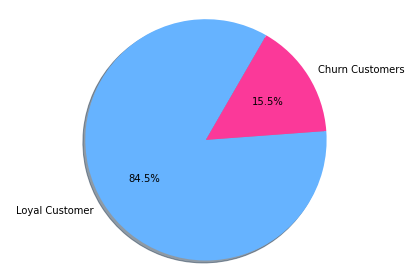

In [22]:
ExitedValues = dffinal.TARGET.value_counts()
labels = ["Loyal Customer","Churn Customers"]
colors = ['#66b3ff', '#fb3999']
fig1, f1 = plt.subplots()
f1.pie(ExitedValues,labels=labels, colors = colors, autopct='%1.1f%%',shadow=True, startangle=60) 
f1.axis('equal')
plt.tight_layout()
plt.show()

# How Gender play a role at the customer churn

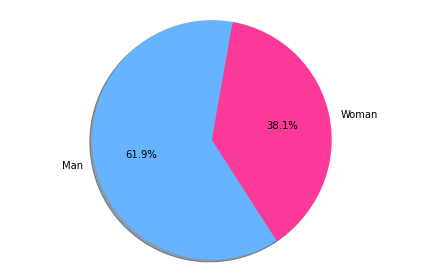

In [23]:
Gendervalues  = dffinal['GENRE'].value_counts().values.tolist()
GenderLabels = ["Man","Woman"]
colors = ['#66b3ff', '#fb3999'] 
fig3, f3 = plt.subplots()
f3.pie(Gendervalues,labels=GenderLabels,colors = colors, autopct='%1.1f%%',shadow=True, startangle= 80) 
# Equal aspect ratio ensures that pie is drawn as a circle
f3.axis('equal')
plt.tight_layout()
plt.show()

# The age distribution of clients

C:\Users\Mohammed\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AGE', ylabel='Density'>

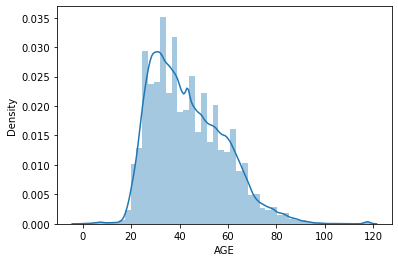

In [24]:
sns.distplot(dffinal.AGE)

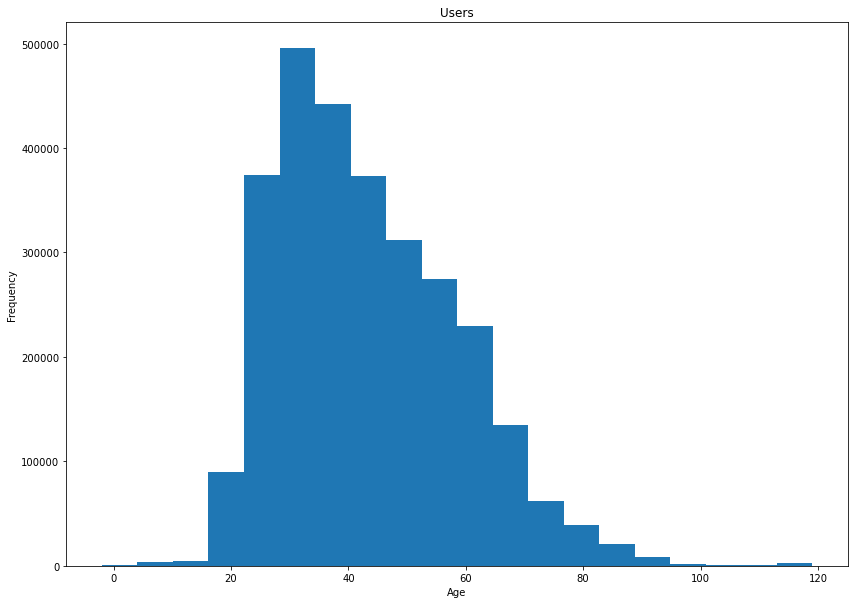

In [26]:
plt.figure(figsize = (14, 10))
plt.title("Users")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.hist(dffinal['AGE'], bins = 20)
plt.show()

In [27]:
churn = dffinal[dffinal["TARGET"]==1]
not_churn = dffinal[dffinal["TARGET"]==0]

# How Geography play a role at the customer churn


In [31]:
villes = ["TANGER","SALE","RABAT","MARRAKECH","FES","CASABLANCA"]
indexes =[]
client = client.reset_index(drop=True)
for i in range(len(client)) :
    if client["ville"][i] in villes :
        indexes.append(i)
client_by_region = client.iloc[indexes]

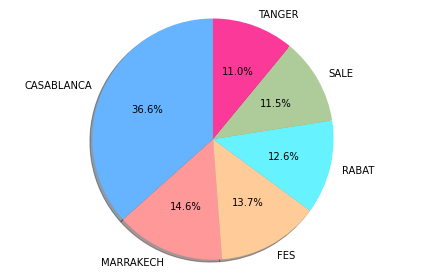

In [32]:
Geosplit = client_by_region.ville.value_counts()
Geovalues  = client_by_region['ville'].value_counts().values.tolist()
Geolabels  = client_by_region['ville'].value_counts().keys().tolist()
colors = ['#66b3ff', '#ff9999' , '#ffcc99',"#66f3ff",'#adcc99','#fb3999']
fig2, f2 = plt.subplots()
f2.pie(Geovalues,labels=Geolabels, colors = colors, autopct='%1.1f%%',shadow=True, startangle=90) 
# Equal aspect ratio ensures that pie is drawn as a circle
f2.axis('equal')
plt.tight_layout()
plt.show()

In [43]:
df = dffinal.drop(["CREDIT_5_MONTH_AGO",'CREDIT_4_MONTH_AGO',"CREDIT_3_MONTH_AGO","CREDIT_2_MONTH_AGO","CREDIT_1_MONTH_AGO","DEBIT_5_MONTH_AGO","DEBIT_4_MONTH_AGO","DEBIT_3_MONTH_AGO","DEBIT_2_MONTH_AGO","DEBIT_1_MONTH_AGO"],axis = 1)

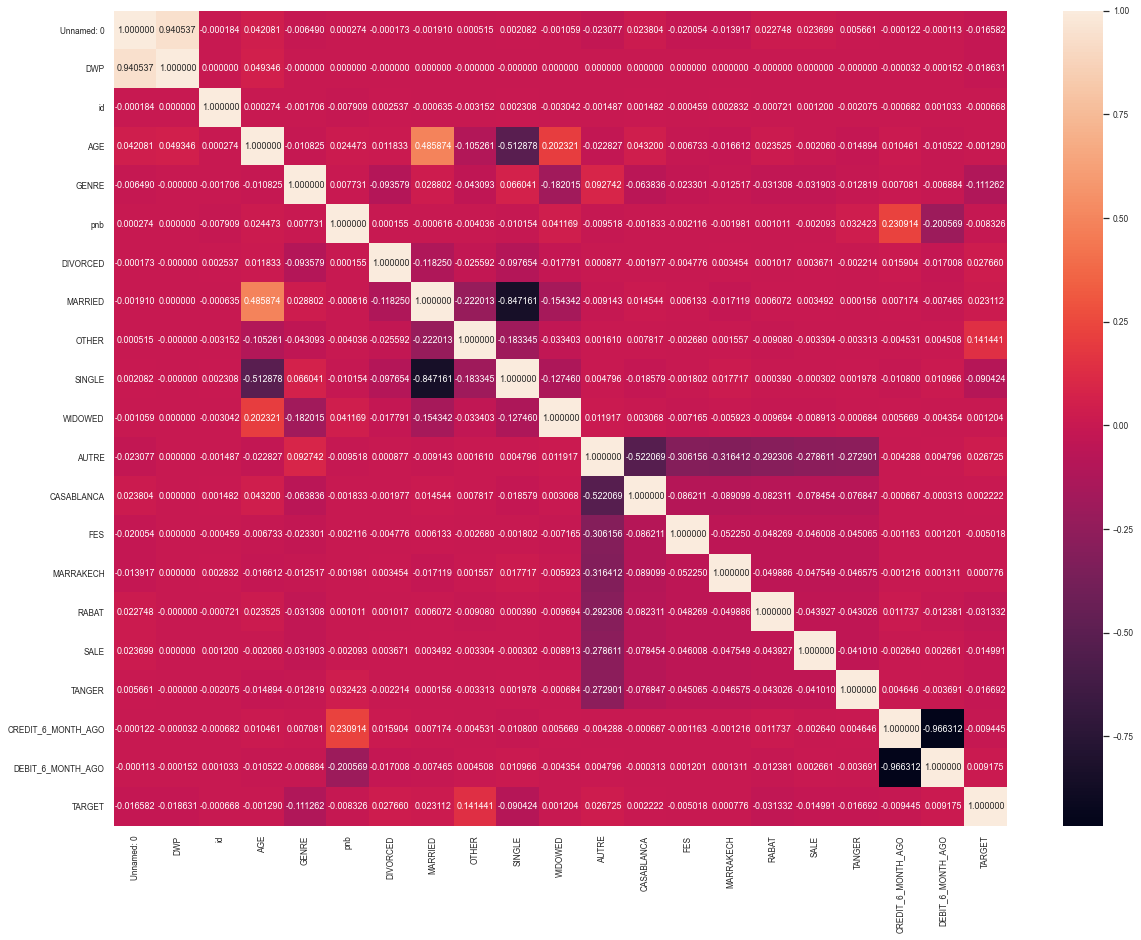

In [45]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
sns.set(font_scale = 0.75)
sns.heatmap(df.corr(), annot = True, fmt = ".6f")
plt.show()